In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargar los datos en un DataFrame
df = pd.read_csv('/content/ds_salaries.csv')

In [ ]:
print (df)

     Unnamed: 0  work_year experience_level employment_type  \
0             0       2020               MI              FT   
1             1       2020               SE              FT   
2             2       2020               SE              FT   
3             3       2020               MI              FT   
4             4       2020               SE              FT   
..          ...        ...              ...             ...   
602         602       2022               SE              FT   
603         603       2022               SE              FT   
604         604       2022               SE              FT   
605         605       2022               SE              FT   
606         606       2022               MI              FT   

                      job_title  salary salary_currency  salary_in_usd  \
0                Data Scientist   70000             EUR          79833   
1    Machine Learning Scientist  260000             USD         260000   
2             Big Dat

In [13]:
print (df.columns)

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')


In [14]:
salario_medio_experiencia = df.groupby('experience_level')['salary'].mean().reset_index()

In [15]:
empleados_experiencia = df['experience_level'].value_counts().reset_index()
empleados_experiencia.columns = ['experience_level', 'Count']

In [16]:
cargo_mas_empleados_experiencia = df.groupby('experience_level')['job_title'].agg(lambda x: x.value_counts().index[0]).reset_index()

In [17]:
top_3_cargos = df['job_title'].value_counts().index[:3]
salario_medio_top_3_cargos = df[df['job_title'].isin(top_3_cargos)].groupby('job_title')['salary'].mean().reset_index()

In [18]:
salario_alto_bajo_experiencia = df.groupby('experience_level')['salary'].agg(['max', 'min']).reset_index()

In [19]:
empleados_por_cargo = df['job_title'].value_counts().reset_index()
empleados_por_cargo.columns = ['job_title', 'Count']

In [20]:
salario_promedio = df['salary'].mean()
empleados_salario_promedio = df[df['salary'] == salario_promedio].shape[0]

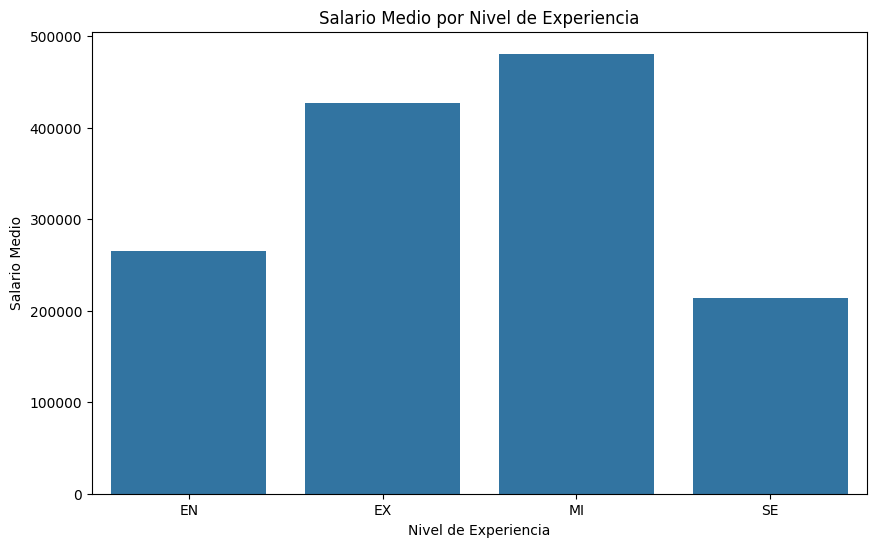

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(data=salario_medio_experiencia, x='experience_level', y='salary')
plt.title('Salario Medio por Nivel de Experiencia')
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Salario Medio')
plt.show()

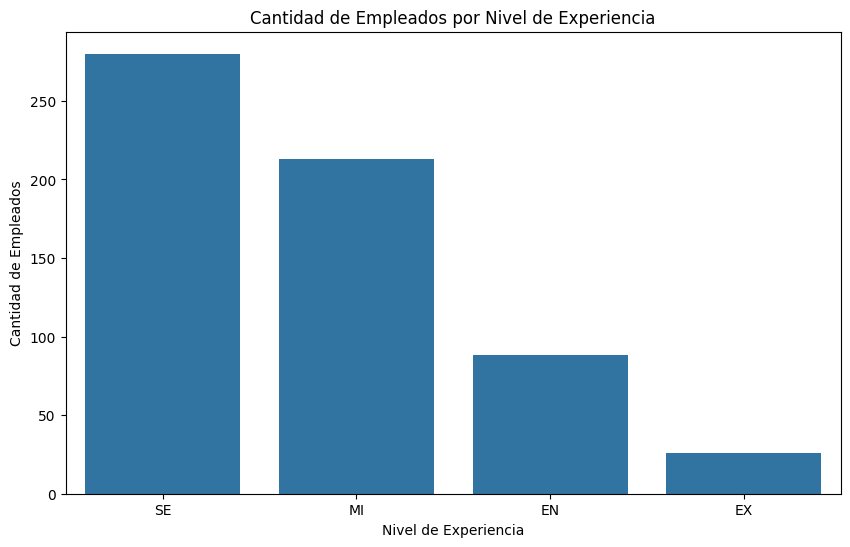

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(data=empleados_experiencia, x='experience_level', y='Count')
plt.title('Cantidad de Empleados por Nivel de Experiencia')
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Cantidad de Empleados')
plt.show()

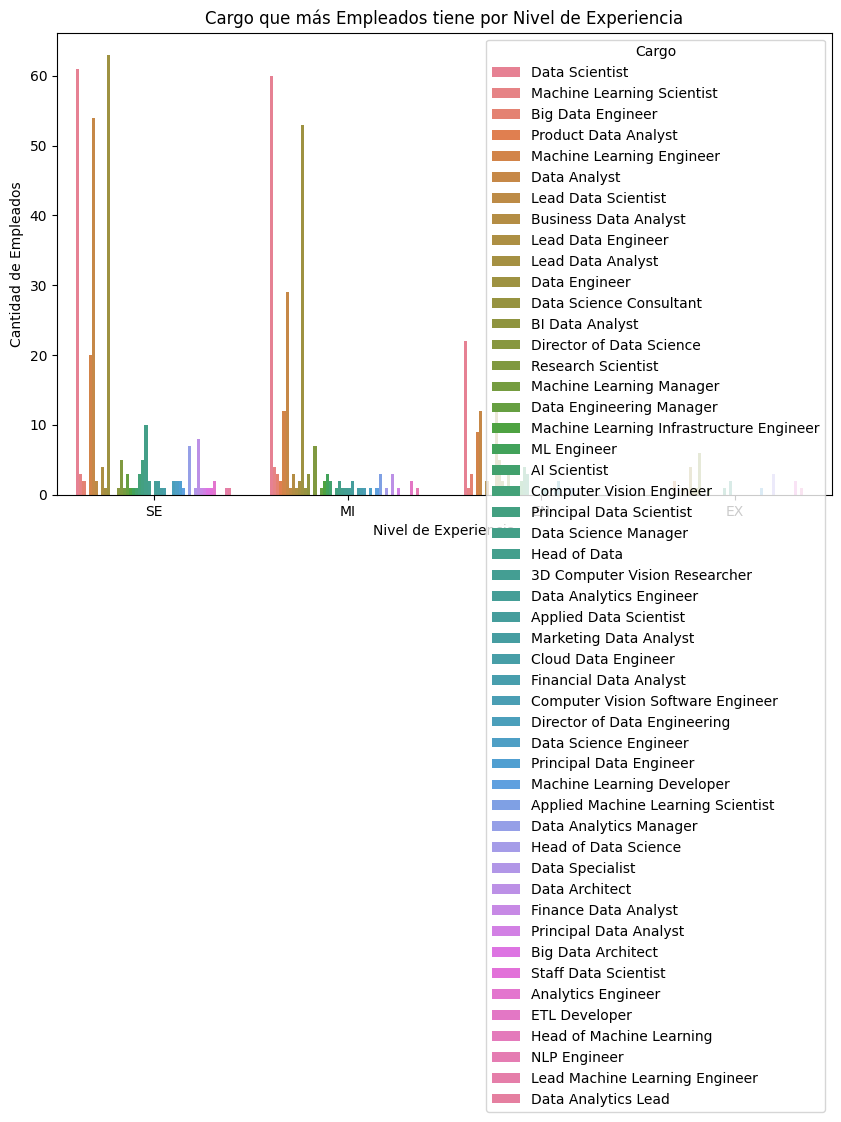

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='experience_level', hue='job_title', order=df['experience_level'].value_counts().index)
plt.title('Cargo que más Empleados tiene por Nivel de Experiencia')
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Cantidad de Empleados')
plt.legend(title='Cargo')
plt.show()


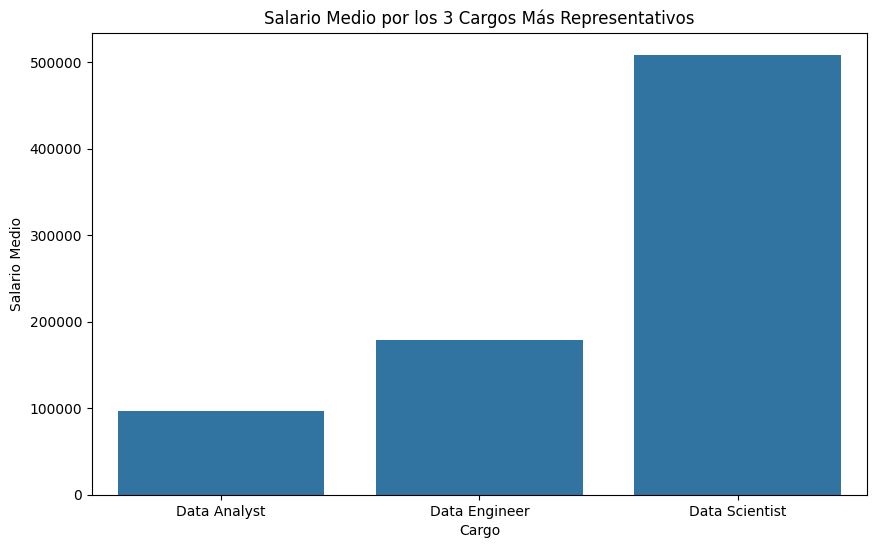

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(data=salario_medio_top_3_cargos, x='job_title', y='salary')
plt.title('Salario Medio por los 3 Cargos Más Representativos')
plt.xlabel('Cargo')
plt.ylabel('Salario Medio')
plt.show()

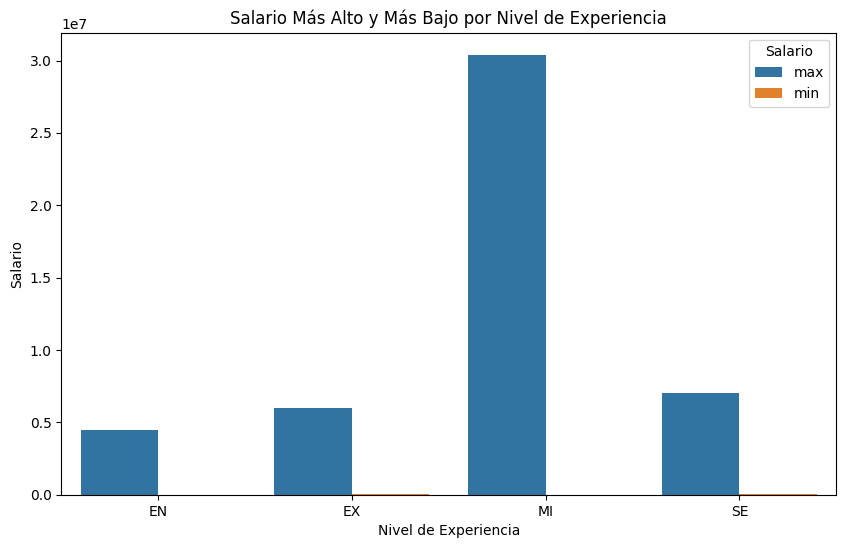

In [25]:
plt.figure(figsize=(10, 6))
salario_alto_bajo_experiencia_melted = salario_alto_bajo_experiencia.melt(id_vars='experience_level', value_vars=['max', 'min'])
sns.barplot(data=salario_alto_bajo_experiencia_melted, x='experience_level', y='value', hue='variable')
plt.title('Salario Más Alto y Más Bajo por Nivel de Experiencia')
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Salario')
plt.legend(title='Salario')
plt.show()

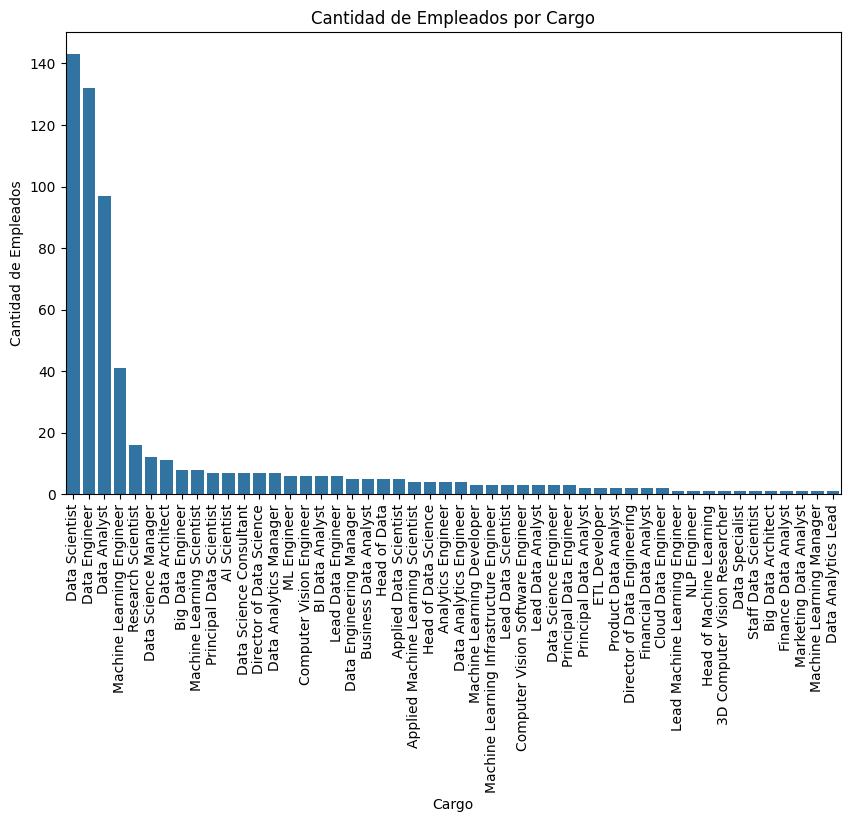

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(data=empleados_por_cargo, x='job_title', y='Count')
plt.title('Cantidad de Empleados por Cargo')
plt.xlabel('Cargo')
plt.ylabel('Cantidad de Empleados')
plt.xticks(rotation=90)
plt.show()

In [27]:
print(f"Cantidad de empleados que ganan un salario promedio: {empleados_salario_promedio}")

Cantidad de empleados que ganan un salario promedio: 0
